In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("summer olympics.csv")

In [4]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


# 1. In how many cities Summer Olympics is held so far?


In [5]:
data = []
print("Cities where summer olympics is held so far are:")
for cities in df['City'].unique():
    data.append([cities , len(df[df['City']  == cities])])
    print(cities)

Cities where summer olympics is held so far are:
Athens
Paris
St Louis
London
Stockholm
Antwerp
Amsterdam
Los Angeles
Berlin
Helsinki
Melbourne / Stockholm
Rome
Tokyo
Mexico
Munich
Montreal
Moscow
Seoul
Barcelona
Atlanta
Sydney
Beijing


# 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [8]:
data = []
print("Sports that is having most number of gold medals so far are:")
gold_per_sport = df[df.Medal == 'Gold'].groupby('Sport').Medal.count().sort_values(ascending = False).reset_index(name = 'Gold_medal_count').head()
gold_per_sport

Sports that is having most number of gold medals so far are:


,Sport,Gold_medal_count
0,Aquatics,1421
1,Athletics,1215
2,Rowing,890
3,Gymnastics,820
4,Fencing,552


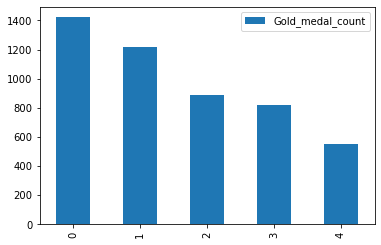

In [9]:
gold_per_sport= df[df.Medal == 'Gold'].groupby('Sport').Medal.count().sort_values(ascending = False).reset_index(name = 'Gold_medal_count').head().plot.bar()

# 3. Which sport is having most number of medals so far? (Top 5)

In [10]:
medals_in_sports=df.groupby('Sport')['Medal'].count().sort_values(ascending=False).head()
medals_in_sports

Sport
Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Medal, dtype: int64

<AxesSubplot:xlabel='Sport'>

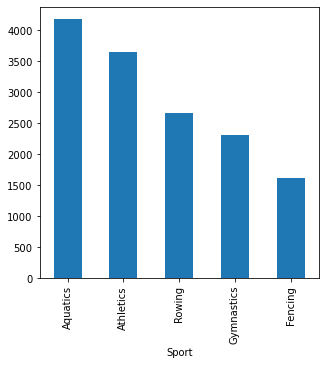

In [7]:
medals_in_sports.head().plot(x = 'Sport', y = 'freq', kind = 'bar', figsize = (5,5))

# 4. Which player has won most number of medals? (Top 5)

In [12]:
print("Top 5 Players with most number of medals")
Athlete_df = df.groupby( 'Athlete').Medal.count().reset_index(name='medal_count').sort_values(by = 'medal_count', ascending = False).set_index("Athlete").head()
Athlete_df

Top 5 Players with most number of medals


,medal_count
Athlete,
"PHELPS, Michael",22
"LATYNINA, Larisa",18
"ANDRIANOV, Nikolay",15
"MANGIAROTTI, Edoardo",13
"ONO, Takashi",13


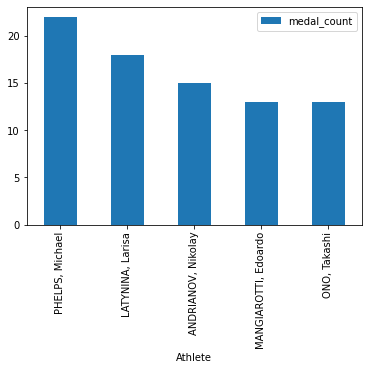

In [13]:
Athlete_df = df.groupby( 'Athlete').Medal.count().reset_index(name='medal_count').sort_values(by = 'medal_count', ascending = False).set_index("Athlete").head().plot.bar()

# 5. Which player has won most number Gold Medals of medals? (Top 5)

In [15]:
print("Top 5 Players with most number of  Gold medals")
Athlete = df.groupby(['Medal','Athlete'] ).Medal.count().reset_index(name='medal_count').sort_values(by = 'medal_count', ascending = False).set_index("Athlete").head()
Athlete

Top 5 Players with most number of medals


,Medal,medal_count
Athlete,,
"PHELPS, Michael",Gold,18
"LATYNINA, Larisa",Gold,9
"LEWIS, Carl",Gold,9
"SPITZ, Mark",Gold,9
"NURMI, Paavo",Gold,9


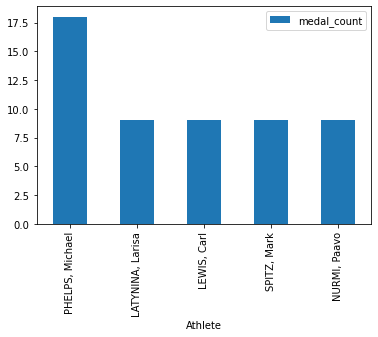

In [16]:
Athlete = df.groupby(['Medal','Athlete'] ).Medal.count().reset_index(name='medal_count').sort_values(by = 'medal_count', ascending = False).set_index("Athlete").head().plot.bar()

# 6. In which year India won first Gold Medal in Summer Olympics?

In [24]:
India=df[df['Country']=='IND'].head()
India

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
241,1900,Paris,Athletics,Athletics,"PRITCHARD, Norman",IND,Men,200M,Silver
244,1900,Paris,Athletics,Athletics,"PRITCHARD, Norman",IND,Men,200M Hurdles,Silver
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold
5513,1928,Amsterdam,Hockey,Hockey,"CHAND, Dyan",IND,Men,Hockey,Gold
5514,1928,Amsterdam,Hockey,Hockey,"GATELEY, Maurice A.",IND,Men,Hockey,Gold


In [23]:
india_fgm=India[India.Medal == 'Gold'].head(1)
india_fgm

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold


# 7. Which event is most popular in terms on number of players? (Top 5)

<AxesSubplot:xlabel='Event'>

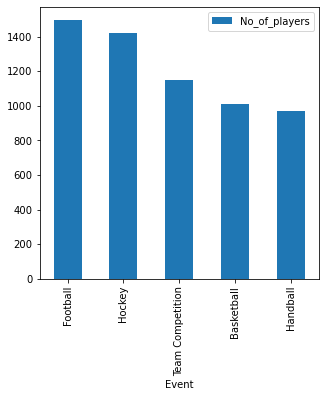

In [11]:
data = []
for event in df['Event'].unique():
    data.append([event , len(df[df['Event']  == event])])
pd.DataFrame(data,columns = ['Event','No_of_players']).sort_values(by='No_of_players', ascending=False).head().plot(x = 'Event', y = 'No_of_players', kind = 'bar', figsize = (5,5))

# 8. Which sport is having most female Gold Medalists? (Top 5)

In [18]:
gold_per_sport = df[df.Gender=='Women'].groupby(['Athlete','Gender','Medal']).Medal.count().sort_values(ascending = False).reset_index(name = 'Gold_medal_count').head()
gold_per_sport

,Athlete,Gender,Medal,Gold_medal_count
0,"LATYNINA, Larisa",Women,Gold,9
1,"THOMPSON, Jenny",Women,Gold,8
2,"FISCHER, Birgit",Women,Gold,8
3,"CASLAVSKA, Vera",Women,Gold,7
4,"OTTO, Kristin",Women,Gold,6


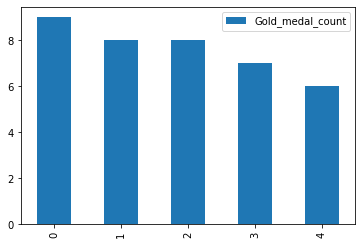

In [19]:
gold_per_sport = df[df.Gender=='Women'].groupby(['Athlete','Gender','Medal']).Medal.count().sort_values(ascending = False).reset_index(name = 'Gold_medal_count').head().plot.bar()